In [208]:
import matplotlib.pyplot as plt
import time
import numpy as np
from constantes import *
from main import *
from bt import *
from pl import *
from gd import *
import random
from itertools import combinations
import statsmodels.api as sm

In [209]:
def generar_instancia_aleatoria(num_maestros, num_habilidades, k, random_k = False):
    maestros = [f'Maestro{i}' for i in range(num_maestros)]
    habilidades = [random.randint(1, num_habilidades) for _ in range(num_maestros)]
    if random_k:
        k = random.randint(1, num_maestros-1)
    return maestros, habilidades, k

In [210]:
def medir_tiempo_ejecucion(algoritmo, maestros, habilidades, k, num_repeticiones=3):
    tiempos = []
    for _ in range(num_repeticiones):
        start_time = time.time()
        algoritmo(maestros, habilidades, k)
        end_time = time.time()
        tiempos.append(end_time - start_time)
    return np.mean(tiempos)

In [211]:
def grafico_comparativo_bt_gd(num_instancias,num_maestros, num_habilidades, k):
    maestros, habilidades, k = generar_instancia_aleatoria(num_maestros, num_habilidades, k,True)

    tiempos_bt = []
    tiempos_pl = []  # Placeholder for Programación Lineal tiempos
    tiempos_gd = []  # Placeholder for Greedy tiempos

    instancias = [i for i in range(0,num_instancias)]

    for _ in range(0, num_instancias):
        print(f"Instancia: maestros = {maestros}, habilidades = {habilidades}, k = {k}") 
        maestros, habilidades, k = generar_instancia_aleatoria(num_maestros, num_habilidades, k)
        
        tiempo_bt = medir_tiempo_ejecucion(p_opt_tribu_agua_bt, maestros, habilidades, k)  
        tiempos_bt.append(tiempo_bt)

        # tiempo_pl = medir_tiempo_ejecucion(p_opt_tribu_agua_pl, maestros, habilidades, k) 
        # tiempos_pl.append(tiempo_pl)

        tiempo_gd = medir_tiempo_ejecucion(p_opt_tribu_agua_gd, maestros, habilidades, k) 
        tiempos_gd.append(tiempo_gd)

    plt.figure(figsize=(12, 8))
    plt.plot(instancias, tiempos_bt, label='Backtracking',color='blue')
    #plt.plot(instancias, tiempos_pl, label='Programación Lineal',color='red')  # Placeholder
    plt.plot(instancias, tiempos_gd, label='Greedy',color='green')  # Placeholder
    plt.xlabel('Tamaño del problema')
    plt.ylabel('Tiempo de ejecución (s)')
    plt.title('Comparación de tiempos de ejecución Greedy vs Backtracking')
    plt.legend()
    plt.grid(True)
    plt.show()


In [212]:
def grafico_pl(num_instancias,num_maestros, num_habilidades, k):
    maestros, habilidades, k = generar_instancia_aleatoria(num_maestros, num_habilidades, k,True)

    tiempos_bt = []
    tiempos_pl = []  # Placeholder for Programación Lineal tiempos
    tiempos_gd = []  # Placeholder for Greedy tiempos

    instancias = [i for i in range(0,num_instancias)]

    for _ in range(0, num_instancias):
        maestros, habilidades, k = generar_instancia_aleatoria(num_maestros, num_habilidades, k)

        tiempo_pl = medir_tiempo_ejecucion(p_opt_tribu_agua_pl, maestros, habilidades, k) 
        tiempos_pl.append(tiempo_pl)

    plt.figure(figsize=(12, 8))
    plt.plot(instancias, tiempos_pl, label='Programación Lineal',color='red')  # Placeholder
    plt.xlabel('Tamaño del problema')
    plt.ylabel('Tiempo de ejecución (s)')
    plt.title('Comparación de tiempos de ejecución Programación Lineal')
    plt.legend()
    plt.grid(True)
    plt.show()

Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2'], habilidades = [965, 751, 321], k = 2
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2'], habilidades = [408, 754, 504], k = 2
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2'], habilidades = [348, 907, 92], k = 2
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2'], habilidades = [236, 120, 623], k = 2
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2'], habilidades = [712, 109, 315], k = 2
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2'], habilidades = [529, 21, 679], k = 2
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2'], habilidades = [933, 328, 653], k = 2
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2'], habilidades = [527, 758, 457], k = 2
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2'], habilidades = [647, 533, 369], k = 2
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2'], habilidades = [539, 891, 826], k = 2


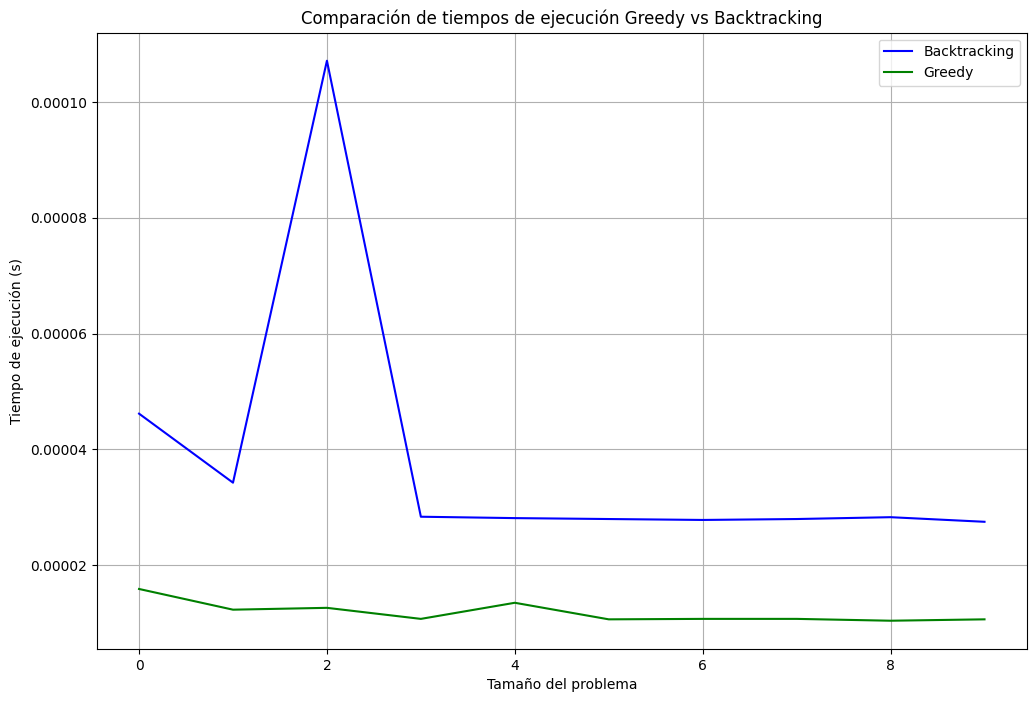

In [213]:
num_instancias = 10
num_maestros = 3
num_habilidades = 1000
k = 6

grafico_comparativo_bt_gd(num_instancias,num_maestros, num_habilidades, k)
grafico_pl(num_instancias,num_maestros, num_habilidades, k)

In [ ]:
def generar_datos_aleatorios(n, max_habilidad=100):
    maestros = list(range(n))
    habilidades = np.random.randint(1, max_habilidad+1, n)
    return maestros, habilidades

In [ ]:
resultados_optimos = [
    1894340,
    1640690,
    807418,
    4298131,
    385249,
    355882,
    172295,
    2906564,
    15659106,
    15292055,
    10694510,
    4311889,
    6377225,
    15974095,
    11513230,
    5427764,
    10322822,
    11971097,
    21081875,
    16828799,
    11417428
]

archivos = [
    PRUEBA_1,
    PRUEBA_2,
    PRUEBA_3,
    PRUEBA_4,
    PRUEBA_5,
    PRUEBA_6,
    PRUEBA_7,
    PRUEBA_8,
    PRUEBA_9,
    PRUEBA_10,
    PRUEBA_11,
    PRUEBA_12,
    PRUEBA_13,
    PRUEBA_14,
    PRUEBA_15,
    PRUEBA_16,
    PRUEBA_17,
    PRUEBA_18,
    PRUEBA_19,
    PRUEBA_20,
    PRUEBA_21
]

In [ ]:
def graficar_relacion(ruta, archivos):
    aproximaciones = []
    optimos = resultados_optimos
    relaciones = []
    instancias = [i for i in range(1, len(archivos) + 1)]

    for archivo in archivos:
        maestros, habilidades, k = leer_archivo(archivo, ruta)
        _, coef_aprox = p_opt_tribu_agua_gd(maestros, habilidades, k)
        aproximaciones.append(coef_aprox)
 
    for coef_aprox, coef_opt in zip(aproximaciones, optimos):
        relaciones.append(coef_aprox / coef_opt)

    print(relaciones)

    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 2)
    plt.plot(instancias, relaciones, label='Relación Aproximación/Óptimo', marker='o', color='green')
    plt.xlabel('Instancia')
    plt.xticks([i for i in range(1,len(archivos)+1)],[archivo.strip('.txt') for archivo in archivos])
    plt.ylabel('Relación')
    plt.grid(True)
    plt.title('Relación entre aproximación y solución óptima para el set de pruebas proveído')
    plt.tight_layout()
    plt.show()


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0003301593334895, 1.000001961803041, 1.0005294305208934, 1.0012027211275616, 1.0000432790124232, 1.0001159377103992, 1.0, 1.0005062858296714, 1.0002679499849945, 1.002437704748362, 1.0000977142687735, 1.0005787697624768, 1.0005603713901239]


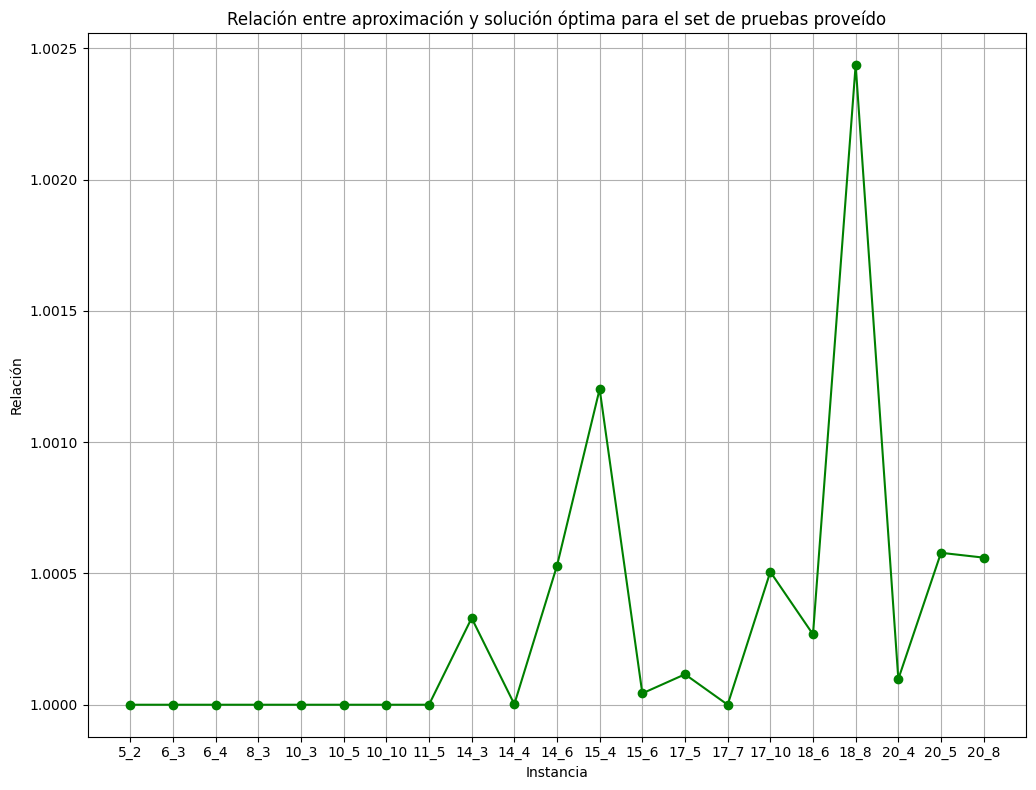

In [ ]:
graficar_relacion(CARPETA,archivos)

# Graficos Relacion Set Aleatorio

In [ ]:
def graficar_relacion_aleatoria(num_instancias, num_maestros, num_habilidades, k):
    aproximaciones = []
    optimos = []
    relaciones = []
    instancias = [i for i in range(1, num_instancias + 1)]

    for instancia in range(1, num_instancias + 1):
        maestros, habilidades, k_actual = generar_instancia_aleatoria(num_maestros, num_habilidades, k)
        _, coef_aprox = p_opt_tribu_agua_gd(maestros, habilidades, k_actual)
        _, coef_opt = p_opt_tribu_agua_bt(maestros, habilidades, k_actual)

        aproximaciones.append(coef_aprox)
        optimos.append(coef_opt)
        relaciones.append(coef_aprox / coef_opt)

    plt.figure(figsize=(10, 6.18))

    plt.subplot(1, 2, 2)
    plt.grid(True)
    plt.plot(instancias, relaciones, label='Relación Aproximación/Óptimo', marker='o', color='green')
    plt.xlabel('Instancia')
    plt.ylabel('Relación')
    plt.title(f'Relación entre Aproximación y Solución Óptima para un set de datos aleatorio con k = {k}')

    plt.tight_layout()
    plt.show()

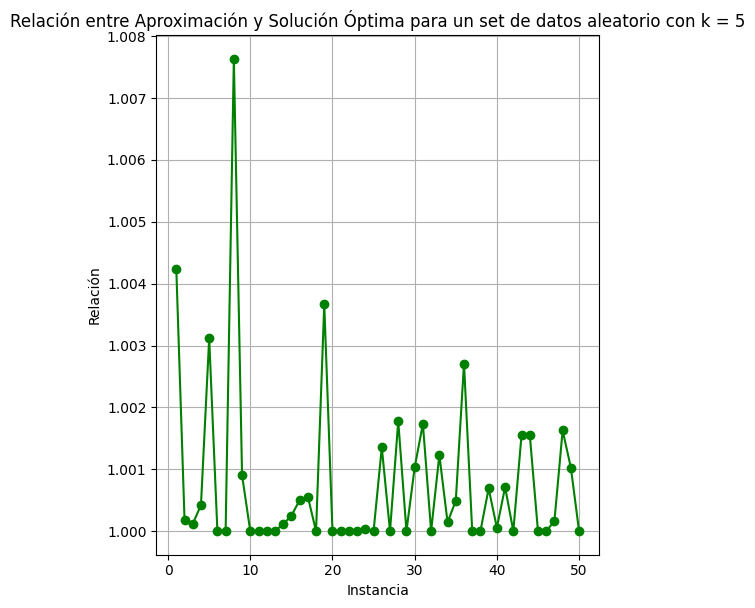

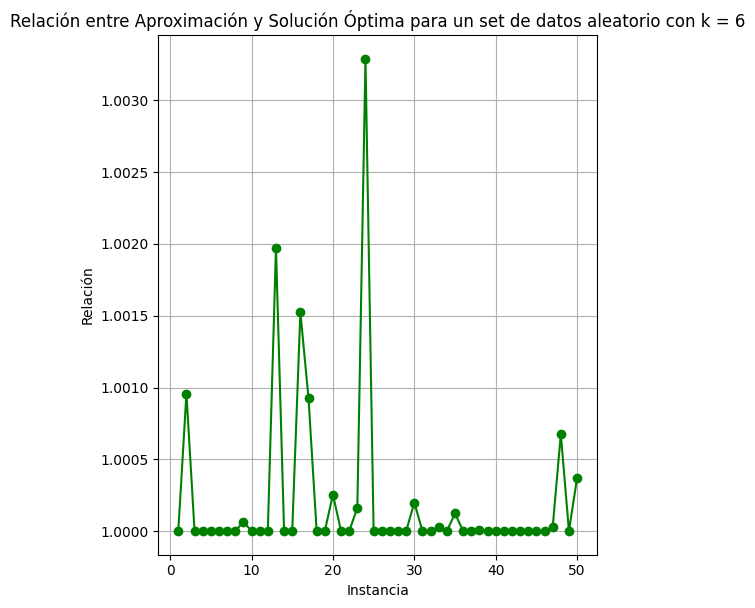

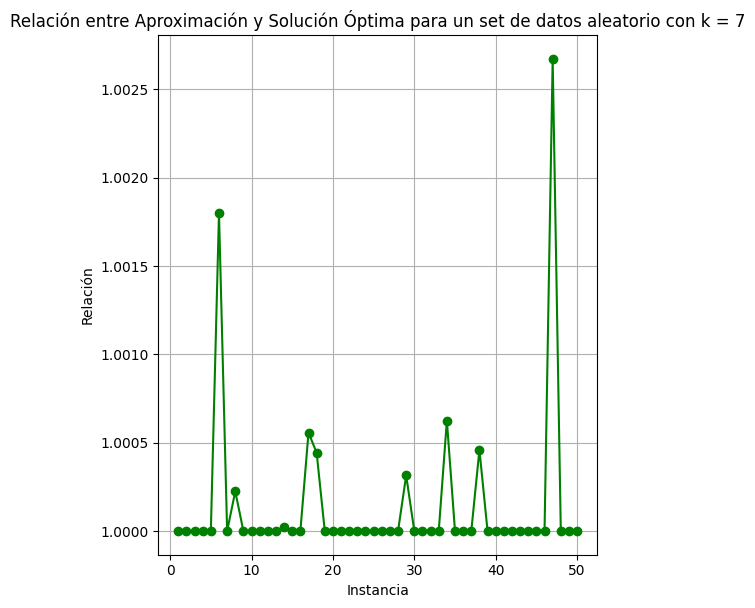

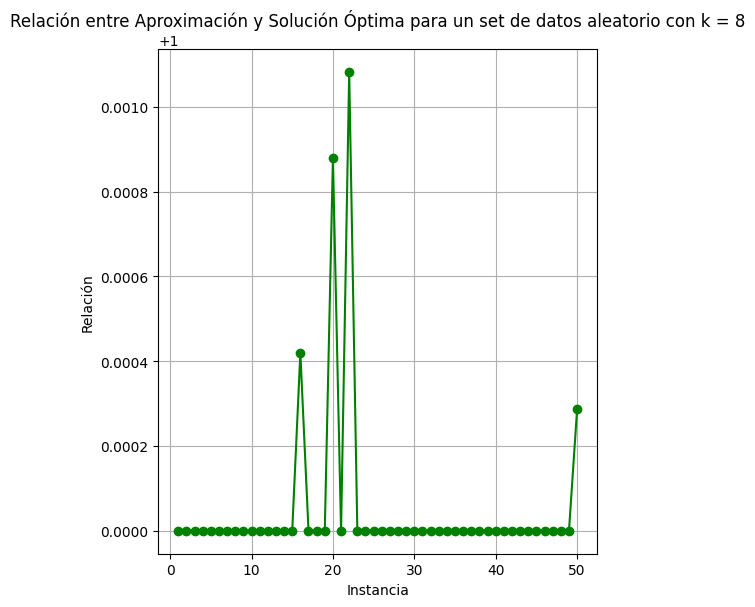

In [ ]:
num_instancias = 50
num_maestros = 12
num_habilidades = 1000
k = 5

graficar_relacion_aleatoria(num_instancias, num_maestros, num_habilidades, k)
graficar_relacion_aleatoria(num_instancias, num_maestros, num_habilidades, k+1)
graficar_relacion_aleatoria(num_instancias, num_maestros, num_habilidades, k+2)
graficar_relacion_aleatoria(num_instancias, num_maestros, num_habilidades, k+3)
